In [5]:
import numpy as np
from specpol import plot_ritz
from specpol.findiff import sturm_liouville

In [13]:
def plot(ritz_results: dict, dbm=None):
    # plot the approximation with some added bars and lines

    fig, ax1, ax2 = plot_ritz(ritz_results, dbm=dbm)

    ax1.set_ylim(-0.5, 2.5)
    ax1.axhline(0.335936534279424, linestyle="--", alpha=0.6)
    ax1.axhline(0.536620364148446, linestyle="--", alpha=0.6)
    ax1.axhline(0.580834838005921, linestyle="--", alpha=0.6)
    ax1.axhline(0.591500609480355, linestyle="--", alpha=0.6)

    ax1.axhline(0.949634991713441, linestyle="--", alpha=0.6)
    ax1.axhline(1.24466406161563, linestyle="--", alpha=0.6)
    ax1.axhline(1.29192807845892, linestyle="--", alpha=0.6)

    ax1.axhspan(-0.3784, -0.34766, facecolor="green", alpha=0.2)
    ax1.axhspan(0.594799, 0.9180581788, facecolor="green", alpha=0.2)
    ax1.axhspan(1.2931662851, 2.2851569481, facecolor="green", alpha=0.2)

    ax2.set_xlim(-3.5, 1.5)
    ax2.set_ylim(-0.5, 1.25)

    ax2.axvline(0.335936534279424, linestyle="--", alpha=0.6)
    ax2.axvline(0.536620364148446, linestyle="--", alpha=0.6)
    ax2.axvline(0.580834838005921, linestyle="--", alpha=0.6)
    ax2.axvline(0.591500609480355, linestyle="--", alpha=0.6)

    ax2.axvline(0.949634991713441, linestyle="--", alpha=0.6)
    ax2.axvline(1.24466406161563, linestyle="--", alpha=0.6)
    ax2.axvline(1.29192807845892, linestyle="--", alpha=0.6)

    ax2.axvspan(-0.3784, -0.34766, facecolor="green", alpha=0.2)
    ax2.axvspan(0.594799, 0.9180581788, facecolor="green", alpha=0.2)
    ax2.axvspan(1.2931662851, 2.2851569481, facecolor="green", alpha=0.2)

In [10]:
def potential(x):
    return - 40 / np.exp(x)
def barrier(x):
    return 1j * (x <= 150)

In [11]:
sl_spec = {}
sl_spec_dbm = {}
for i in range(50, 475, 25):
    sl_spec[i] = sturm_liouville(potential, 1/100, np.pi / 8, i)
    sl_spec_dbm[i] = sturm_liouville(potential, 1/100, np.pi / 8, i, dbm=barrier)

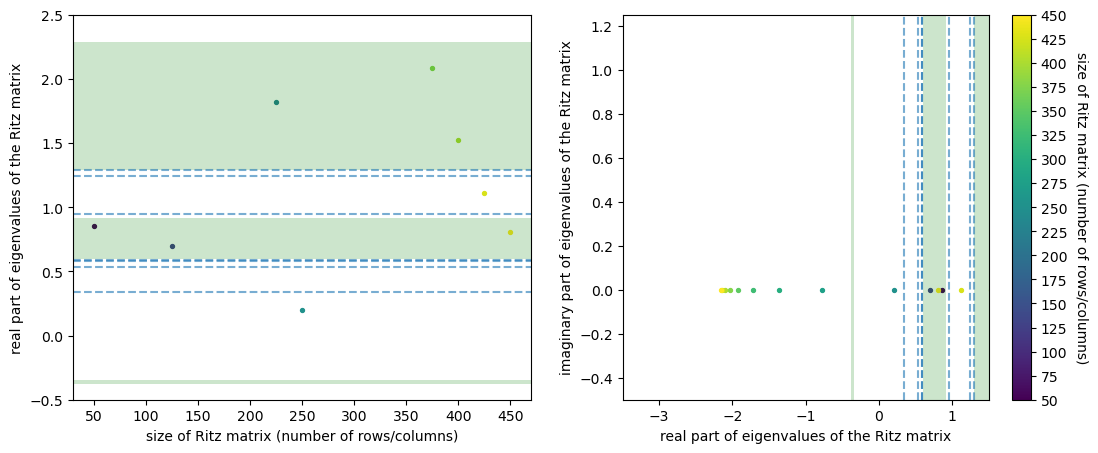

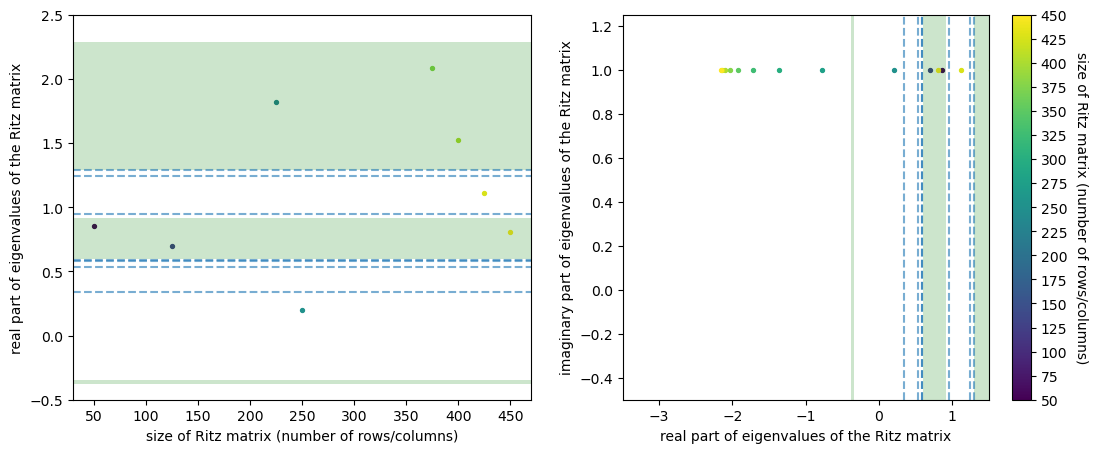

In [14]:
plot(sl_spec)
plot(sl_spec_dbm)

In [6]:
sp, vc = sturm_liouville(potential, 2 * np.pi / 20, np.pi / 8, 400, vectors=True)

In [7]:
sp[47]

0.5885313032829748

In [8]:
sp[27]

0.24066858685259773

In [9]:
sp[398]  # weird intermittent guy
sp[27]  # good eigenvalue

0.24066858685259773

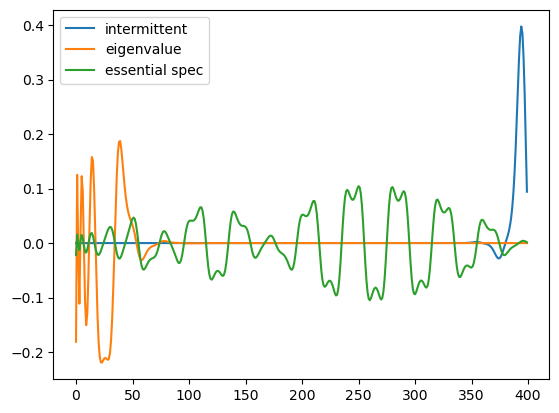

In [13]:
import matplotlib.pyplot as plt

plt.plot(vc[:,398], label='intermittent')
plt.plot(vc[:,27], label='eigenvalue')
plt.plot(vc[:,47], label='essential spec')
plt.legend()

In [11]:
scheme_matrix = sturm_liouville(potential, 2 * np.pi / 20, np.pi / 8, 400, matrix=True)

np.testing.assert_allclose(scheme_matrix * vc[398].T, scheme_matrix * sp[398])

AssertionError: 
Not equal to tolerance rtol=1e-07, atol=0

Mismatched elements: 1198 / 160000 (0.749%)
Max absolute difference: 7.4131446
Max relative difference: 1.9891809
 x: array([[-0.      , -0.      ,  0.      , ..., -0.      ,  0.      ,
         0.      ],
       [-0.      , -0.      , -0.      , ..., -0.      ,  0.      ,...
 y: array([[ 1.282305,  1.919279, -0.      , ..., -0.      , -0.      ,
        -0.      ],
       [ 1.919279,  2.999272,  1.919279, ..., -0.      , -0.      ,...